Explicit euler method
step	ti	yi	exact
0	0.0	1.0	1.0
1	0.1	1.1	1.1103
2	0.2	1.22	1.2428
3	0.3	1.362	1.3997
4	0.4	1.5282	1.5836
5	0.5	1.721	1.7974
6	0.6	1.9431	2.0442
7	0.7	2.1974	2.3275
8	0.8	2.4872	2.6511
9	0.9	2.8159	3.0192
10	1.0	3.1875	3.4366


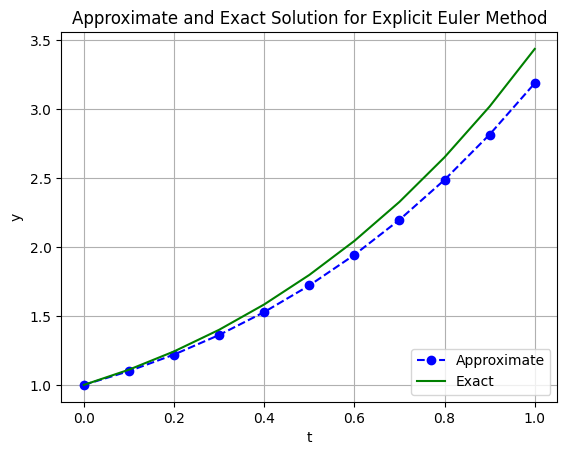

Implicit euler method
step	ti	yi	exact
0	0.0	1.0	1.0
1	0.1	1.12	1.1103
2	0.2	1.262	1.2428
3	0.3	1.4282	1.3997
4	0.4	1.621	1.5836
5	0.5	1.8431	1.7974
6	0.6	2.0974	2.0442
7	0.7	2.3872	2.3275
8	0.8	2.7159	2.6511
9	0.9	3.0875	3.0192
10	1.0	3.5062	3.4366


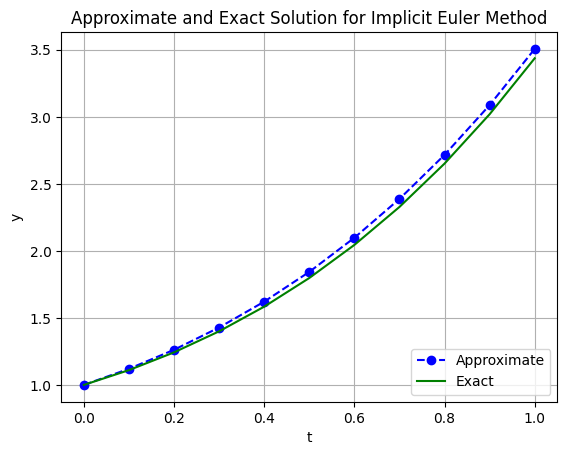

Explicit euler method
step	ti	yi	exact
0	0.0	1.0	1.0
1	0.1	0.9	0.9091
2	0.2	0.819	0.8333
3	0.3	0.7519	0.7692
4	0.4	0.6954	0.7143
5	0.5	0.647	0.6667
6	0.6	0.6052	0.625
7	0.7	0.5685	0.5882
8	0.8	0.5362	0.5556
9	0.9	0.5075	0.5263
10	1.0	0.4817	0.5


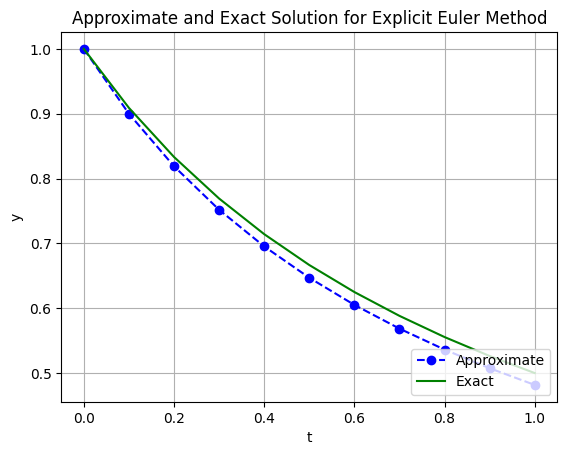

Implicit euler method
step	ti	yi	exact
0	0.0	1.0	1.0
1	0.1	0.919	0.9091
2	0.2	0.8519	0.8333
3	0.3	0.7954	0.7692
4	0.4	0.747	0.7143
5	0.5	0.7052	0.6667
6	0.6	0.6685	0.625
7	0.7	0.6362	0.5882
8	0.8	0.6075	0.5556
9	0.9	0.5817	0.5263
10	1.0	0.5585	0.5


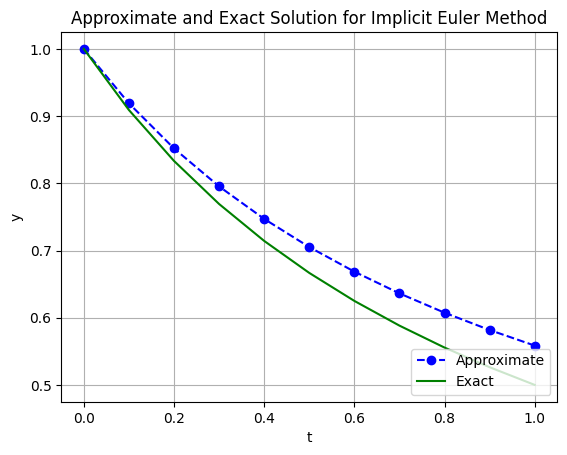

In [35]:
import numpy as np
import matplotlib.pyplot as plt

class Euler:
    __n: int
    __h: float
    __a: float
    __b: float
    __t0: float
    __y0: float
    __f: any
    __t: float = []
    __y: float = []
    __exact: any
    __e: float = []
    
    def __init__(self, n: int, h: float, b: float, t0: float, y0: float, f: any, exact: any):
        self.__n =  n
        self.__h = h
        self.__a = t0
        self.__b = b
        self.__t0 = t0
        self.__y0 = y0
        self.__f = f
        self.__t = np.zeros(self.__n + 1)
        self.__y = np.zeros(len(self.__t))
        self.__t[0] = self.__t0
        self.__y[0] = self.__y0
        self.__exact = exact
        
    def implicit_method(self):
        for i in range(0, self.__n):
            self.__t[i + 1] = self.__t0 + self.__h * (i + 1)
            
            self.__y[i + 1] = self.__y[i] + self.__h * self.__f(self.__t[i + 1], self.__y[i + 1])
        
        self.__e = self.__exact(self.__t)
            
        self.__Printing("Implicit")
        self.__DrawGraph("Implicit")
        
    def explicit_method(self):
        for i in range(0, self.__n):
            self.__t[i + 1] = self.__t0 + self.__h * (i + 1)
            
            self.__y[i + 1] = self.__y[i] + self.__h * self.__f(self.__t[i], self.__y[i])
        
        self.__e = self.__exact(self.__t)

        self.__Printing("Explicit")
        self.__DrawGraph("Explicit")
        
    def __Printing(self, type: str):
        print(type, "euler method", sep=" ")
        print("==============================")
        print("step", "ti", "yi", "exact", sep="\t")
        for idx, num in enumerate(self.__t):
            print(idx, round(num, 4), round(self.__y[idx], 4), round(self.__e[idx],4), sep="\t")
        
    def __DrawGraph(self, type: str):
        self.__t = np.array(self.__t)
        plt.plot(self.__t, self.__y, 'bo--', label='Approximate')
        plt.plot(self.__t, self.__e, 'g', label="Exact")
        plt.title('Approximate and Exact Solution for ' + type + ' Euler Method')
        plt.xlabel('t')
        plt.ylabel('y')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()

''' euler: Euler = Euler(n=10, h=0.1, b=2, t0=1, y0=-1, f=lambda t,
                     y: (1 / (t * t) - y / t - (y * y)), exact=lambda t: -1 / t)
euler.explicit_method()

euler2: Euler = Euler(n=10, h=0.1, b=1, t0=0, y0=-1, f=lambda t, y: np.exp(-t), exact=lambda t: -np.exp(-t))
euler2.explicit_method()

euler3: Euler = Euler(n=5, h=0.1, b=2, t0=1, y0=1, f=lambda t, s: 2 * t, exact=lambda t: np.power(t, 2) )
euler3.explicit_method()

euler4: Euler = Euler(n=10, h=0.3, b=4, t0=0, y0=1, f=lambda t, y: -2 * t * y, exact=lambda t: np.exp(-np.power(t, 2)))
euler4.explicit_method() '''
 
''' euler5: Euler = Euler(n=10, h=0.1, b=1, t0=0, y0=1, f=lambda t, y: t + y, exact=lambda t: -t -1 + 2 * np.exp(t))
euler5.explicit_method()
euler5.implicit_method() '''

euler6: Euler = Euler(n=10, h=0.1, b=5, t0=0, y0=1, f=lambda t, y: -np.power(y, 2), exact=lambda t: 1 / (t + 1))
euler6.explicit_method()
euler6.implicit_method()